In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import math

In [2]:
#Stations = Akola, Anand, Anantpur, Banglore, Bhubaneswar, Bijapur, Dapoli, Faizabad, Hissar, Jabalpur, Jorhat , Kanpur, Kovilpatti, Ludhiana, Mohanpur, Palampur, Parbhani, Raipur, Rakh Dhiansar, Ranchi, Ranichauri, Samastipur, Solapur, Thrissur, Udaipur


In [3]:
excel_file = pd.ExcelFile('/content/station_data.xlsx')
dataframes = []
for sheet_name in excel_file.sheet_names:
    df = pd.read_excel('/content/station_data.xlsx', sheet_name=sheet_name)
    dataframes.append(df)

In [4]:
station_df = pd.concat(dataframes[2:])
station_df

,Station,Date,Latitude,Longitude,Elevation,max_temp,min_temp,max_RH,min_RH,wind_speed,rainfall,sunshine hours,evaporation,Solar Radiation,ETo,Solar Radiation
0,Akola,2001-01-01,20°42',77°02',282,22.0,17.0,96.0,70.0,5.3,38.2,0.0,1.4,6.43,1.58,NaN
1,Akola,2001-01-02,20°42',77°02',282,23.0,9.6,85.0,45.0,3.4,0.0,3.4,2.2,10.49,2.10,NaN
2,Akola,2001-01-03,20°42',77°02',282,23.8,9.2,71.0,42.0,2.7,0.0,8.3,2.4,16.36,2.56,NaN
3,Akola,2001-01-04,20°42',77°02',282,25.7,8.7,75.0,36.0,3.0,0.0,8.3,3.0,16.39,2.73,NaN
4,Akola,2001-01-05,20°42',77°02',282,26.6,8.1,82.0,34.0,3.2,0.0,8.3,3.2,16.42,2.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Udaipur,2005-12-27,25°21',74°38',433,25.2,3.2,94.0,22.0,1.4,0.0,8.3,2.0,14.73,1.93,NaN
1822,Udaipur,2005-12-28,25°21',74°38',433,27.6,3.7,94.0,38.0,1.6,0.0,8.7,2.0,15.18,2.14,NaN
1823,Udaipur,2005-12-29,25°21',74°38',433,25.8,6.2,89.0,39.0,1.6,0.0,8.7,2.0,15.20,2.08,NaN
1824,Udaipur,2005-12-30,25°21',74°38',433,24.6,4.7,91.0,29.0,2.1,0.0,9.0,2.2,15.55,2.13,NaN


In [5]:
station_df['Date'] = pd.to_datetime(station_df['Date'], format='%Y/%m/%d')
station_df['Julian Day'] = station_df['Date'].dt.dayofyear

In [6]:
def convert_to_radians(angle):
    angle = str(angle)  # Convert angle to string
    parts = angle.split('°')
    degrees = int(parts[0])
    minutes = int(parts[1].rstrip('\''))
    total_minutes = degrees * 60 + minutes
    radians = math.radians(total_minutes / 60)
    return radians

In [7]:
# Apply the conversion function to the "Latitude" and "Longitude" columns
station_df['Latitude (in rad)'] = station_df['Latitude'].apply(convert_to_radians)
station_df['Longitude (in rad)'] = station_df['Longitude'].apply(convert_to_radians)
station_df['wind_speed'] = 5*station_df['wind_speed']/18
station_df['mean_temp'] = station_df[['max_temp', 'min_temp']].mean(axis=1)
station_df['mean_RH'] = station_df[['max_RH', 'min_RH']].mean(axis=1)
station_df['max_DPT'] = (4030 * (235 + station_df['max_temp']) / (4030 - ((station_df['max_temp'] + 235) * np.log(station_df['max_RH'] / 100)))) - 235
station_df['min_DPT'] = (4030 * (235 + station_df['min_temp']) / (4030 - ((station_df['min_temp'] + 235) * np.log(station_df['min_RH'] / 100)))) - 235
station_df['mean_DPT'] = station_df[['max_DPT', 'min_DPT']].mean(axis=1)
columns_order = ['Julian Day','max_temp','min_temp','mean_temp','max_RH','min_RH','mean_RH','max_DPT','min_DPT','mean_DPT','wind_speed','rainfall','sunshine hours','evaporation','Solar Radiation','ETo']
station_df = station_df.reindex(columns=columns_order)
station_df = station_df.dropna(axis = 0)

On analysis, it has been clear that on applying StandardScaler transformer, there is not much appreciable change in the accuracy of the model, and hence it has been kept optional.

```
scaler = StandardScaler()
numeric_columns = station_df.select_dtypes(include='number')
normalized_data = scaler.fit_transform(numeric_columns)
normalized_df = pd.DataFrame(normalized_data, columns=list(numeric_columns))
correlation_matrix = normalized_df.corr()



As we go further, the lasso regressor model limits the test data score lower than the vanilla regression, the reason being unnecessary features which have no much significance for training the model.


```
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1)
```



In [8]:
station_df

,Julian Day,max_temp,min_temp,mean_temp,max_RH,min_RH,mean_RH,max_DPT,min_DPT,mean_DPT,wind_speed,rainfall,sunshine hours,evaporation,Solar Radiation,ETo
0,1,22.0,17.0,19.50,96.0,70.0,83.0,21.332692,11.502201,16.417446,1.472222,38.2,0.0,1.4,6.43,1.58
1,2,23.0,9.6,16.30,85.0,45.0,65.0,20.343297,-1.706623,9.318337,0.944444,0.0,3.4,2.2,10.49,2.10
2,3,23.8,9.2,16.50,71.0,42.0,56.5,18.230408,-2.995692,7.617358,0.750000,0.0,8.3,2.4,16.36,2.56
3,4,25.7,8.7,17.20,75.0,36.0,55.5,20.936986,-5.479922,7.728532,0.833333,0.0,8.3,3.0,16.39,2.73
4,5,26.6,8.1,17.35,82.0,34.0,58.0,23.272909,-6.753502,8.259703,0.888889,0.0,8.3,3.2,16.42,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,361,25.2,3.2,14.20,94.0,22.0,58.0,24.164629,-16.366615,3.899007,0.388889,0.0,8.3,2.0,14.73,1.93
1822,362,27.6,3.7,15.65,94.0,38.0,66.0,26.545480,-9.238557,8.653461,0.444444,0.0,8.7,2.0,15.18,2.14
1823,363,25.8,6.2,16.00,89.0,39.0,64.0,23.847913,-6.667954,8.589979,0.444444,0.0,8.7,2.0,15.20,2.08
1824,364,24.6,4.7,14.65,91.0,29.0,60.0,23.032402,-11.738190,5.647106,0.583333,0.0,9.0,2.2,15.55,2.13


In [9]:
x = station_df.drop(['ETo','rainfall','mean_temp','mean_RH','max_DPT','min_DPT','mean_DPT','evaporation'],axis=1)
y = station_df.ETo

In [10]:
x.head()

,Julian Day,max_temp,min_temp,max_RH,min_RH,wind_speed,sunshine hours,Solar Radiation
0,1,22.0,17.0,96.0,70.0,1.472222,0.0,6.43
1,2,23.0,9.6,85.0,45.0,0.944444,3.4,10.49
2,3,23.8,9.2,71.0,42.0,0.750000,8.3,16.36
3,4,25.7,8.7,75.0,36.0,0.833333,8.3,16.39
4,5,26.6,8.1,82.0,34.0,0.888889,8.3,16.42


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9231085321817383

In [13]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)

0.9231138159397934

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)

0.9231085322815384

In [15]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train, y_train)
svr_model.score(x_test,y_test)

0.9350048459558442

In [16]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(x_train, y_train)
dt_model.score(x_test,y_test)

0.9639682816458398

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth = 200, random_state=42)
rf_model.fit(x_train, y_train)
rf_model.score(x_test,y_test)

0.9922774772859587

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)
gb_model.score(x_test,y_test)

0.983373598155494

In [19]:
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes=(100,50), batch_size = 50, activation='relu', solver='adam', learning_rate = 'adaptive', random_state=42)
nn_model.fit(x_train, y_train)
nn_model.score(x_test,y_test)

0.9974077665317791

In [20]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_test,y_test)

0.9937637758553464

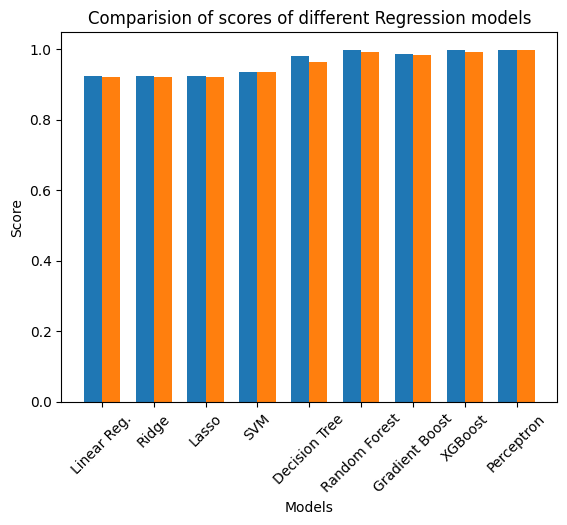

In [21]:
import matplotlib.pyplot as plt
model_names = ['Linear Reg.', 'Ridge', 'Lasso', 'SVM','Decision Tree','Random Forest','Gradient Boost','XGBoost','Perceptron']
train_scores = [lr.score(x_train,y_train), ridge.score(x_train,y_train), lasso.score(x_train,y_train),svr_model.score(x_train,y_train),dt_model.score(x_train,y_train),rf_model.score(x_train,y_train),gb_model.score(x_train,y_train),xgb_model.score(x_train,y_train),nn_model.score(x_train,y_train)]
test_scores = [lr.score(x_test,y_test), ridge.score(x_test,y_test), lasso.score(x_test,y_test),svr_model.score(x_test,y_test),dt_model.score(x_test,y_test),rf_model.score(x_test,y_test),gb_model.score(x_test,y_test),xgb_model.score(x_test,y_test),nn_model.score(x_test,y_test)]
# Width of each bar
bar_width = 0.35

length = np.arange(len(model_names))
plt.bar(length, train_scores, width=bar_width, label='Training Data Accuracy')
plt.bar(length + bar_width, test_scores, width=bar_width, label='Testing Data Accuracy')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparision of scores of different Regression models')
plt.xticks(length + bar_width / 2, model_names)
plt.xticks(rotation=45)
# Display the plot
plt.show()

### The Best model hence would be a **Multi-layer Perceptron** with an accuracy score of 99.7%

In [22]:
import pickle
with open('weather data regressor.pickle','wb') as f:
  pickle.dump(nn_model,f)